<a href="https://colab.research.google.com/github/varuntyagiai/skills-introduction-to-github/blob/main/29_KN_Simple_Linear_Regression_example_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple linear Regression**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
## Read the data set
df=pd.read_csv('/content/sample_data/height-weight.csv')

In [55]:
df.head()
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


Text(0, 0.5, 'Height')

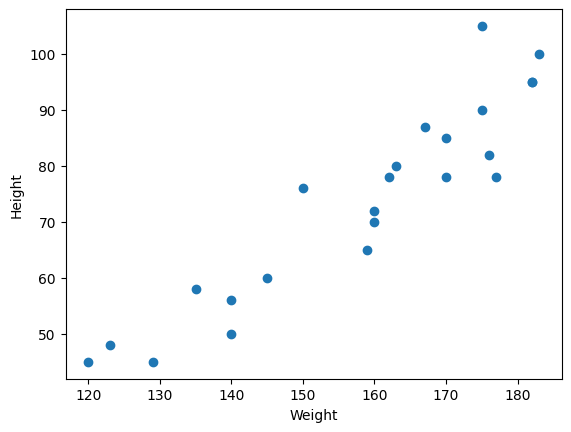

In [56]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [57]:

##divide our dataset into independent and dependent features
X=df[['Weight']] #dependent features
y=df['Height'] #independent features

In [58]:
#Train Test Split data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
X.shape

(23, 1)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [61]:
#Standardize the data Train independent data
from sklearn.preprocessing import StandardScaler



In [62]:
scaler=StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train.values.reshape(-1,1))

In [64]:
X_test=scaler.transform(X_test.values.reshape(-1,1))

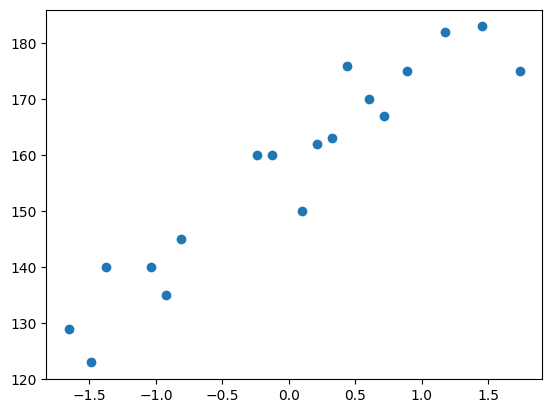

In [65]:
plt.scatter(X_train,y_train)

In [66]:
## Train Simple linear Regression Model
from sklearn.linear_model import LinearRegression

In [67]:
regressor=  LinearRegression()

In [68]:
regressor.fit(X_train,y_train)

LinearRegression()

In [69]:
print("the slope of weight is ",regressor.coef_)
print("the intercept of weight is ",regressor.intercept_)

the slope of weight is  [17.03440872]
the intercept of weight is  157.5


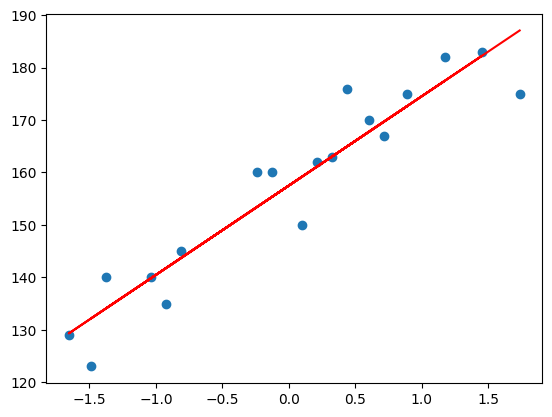

In [70]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')


Prediction of Train
1.Predicted height output=intercept + coef_(Weights)
2.y_pred_train=157.5 + 17.03(X_train)


Prediction of Test Data
1.Predicted height output=intercept + coef_(Weights)
2.y_pred_test=157.5 + 17.03(X_test) **bold text**

In [72]:
y_pred_test=regressor.predict(X_test)

In [74]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

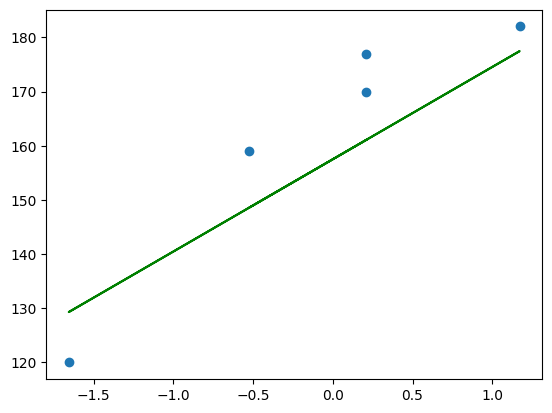

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'g')

In [78]:
## Performance Metrices
## MSE,MAE,RMSE
## Rsquare & adjusted Rsquare
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [82]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse,mae,rmse,r2)

109.77592599051664 9.822657814519232 10.477400726827081 0.776986986042344


##Adjusted Rsquare
R2=1-[(1-R2)*(n-1)/(n-K-1)]

In [83]:
#diaplay adjusted r square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [94]:
#new data point  weight is  80 now predict height
scaled_weight=scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [97]:
print ("the height predictionfor weight 80 kg is :", regressor.predict(scaled_weight))

the height predictionfor weight 80 kg is : [163.01076266]


Assumptions
plot a scatter plot for the prediction


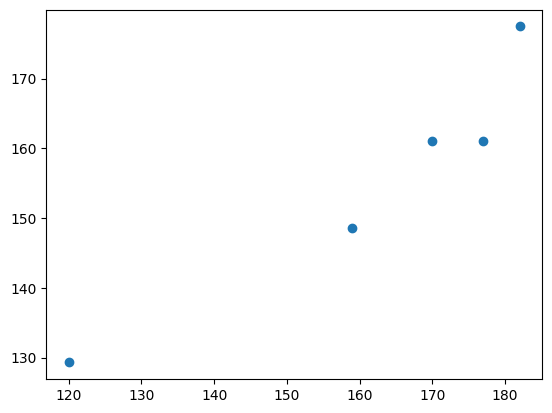

In [106]:
plt.scatter(y_test,y_pred_test)

In [99]:
## Residual
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


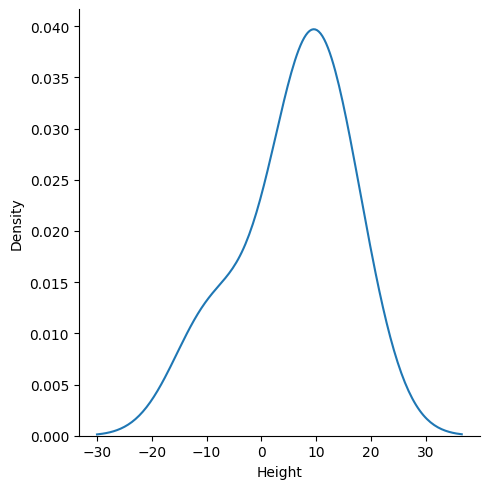

In [104]:
#plot the residuals
import seaborn as sns
# sns.displot(residuals,kde=True)
sns.displot(residuals,kind='kde')

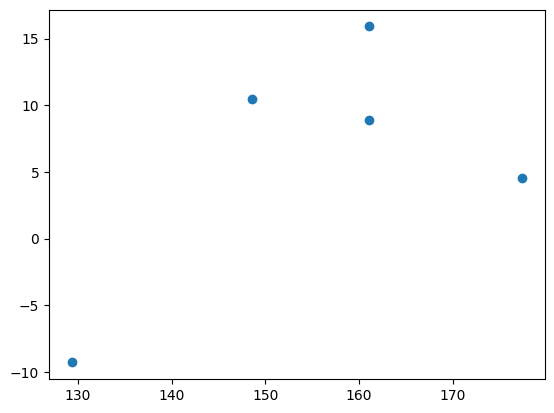

In [105]:
##Scatter plot with respect to prediction & residulas
##Uniform distributions
plt.scatter(y_pred_test,residuals)

In [ ]:
## Pickling the model so we can use this file /model for prediction